<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Adjustification-of-Log-Returns-" data-toc-modified-id="-Adjustification-of-Log-Returns--1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font face="gotham" color="purple"> Adjustification of Log Returns </font></a></span></li><li><span><a href="#-Relations-of-Log-Return-and-Simple-Return" data-toc-modified-id="-Relations-of-Log-Return-and-Simple-Return-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><font face="gotham" color="purple"> Relations of Log Return and Simple Return</font></a></span></li></ul></div>

In [22]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

In [28]:
import warnings
warnings.filterwarnings('ignore')

# <font face="gotham" color="purple"> Adjustification of Log Returns </font>

The adjustification of using log return/growth is to avoid positive bias of arithmic return. An example will show the difference.

Suppose you are hold a stock share for four periods.

In [6]:
data = pd.DataFrame([100, 200, 150, 90], columns = ['price']);data

,price
0,100
1,200
2,150
3,90


To calculate the simple arithmetic return:

In [13]:
data.pct_change().mean()

price    0.116667
dtype: float64

We found a ludicrous outcome, that even if you lost money comparing to your initial investment, you have an average of $11.67\%$ annual return.

In [19]:
logReturn = np.log(data) - np.log(data.shift(1)); logReturn

,price
0,NaN
1,0.693147
2,-0.287682
3,-0.510826


We can that annual log return gives us a fairly precise measurement of the performance, annual growth rate of $-3.51\%$

In [20]:
logReturn.mean()

price   -0.03512
dtype: float64

# <font face="gotham" color="purple"> Relations of Log Return and Simple Return</font>

The log return is calculated by

$$
r_t = \ln \frac{P_t}{P_{t-1}} = p_t-p_{t-1}
$$

where $p_t$ is $\ln P_t$.

We take the exponential to recover single return $R_t$

$$
e^{r_t} = \frac{P_t}{P_{t-1}} = 1+R_{t} \quad \Longrightarrow \quad R_t = e^{r_t}-1
$$

In [29]:
R = np.linspace(-1,1,100)
r = np.log(R+1)


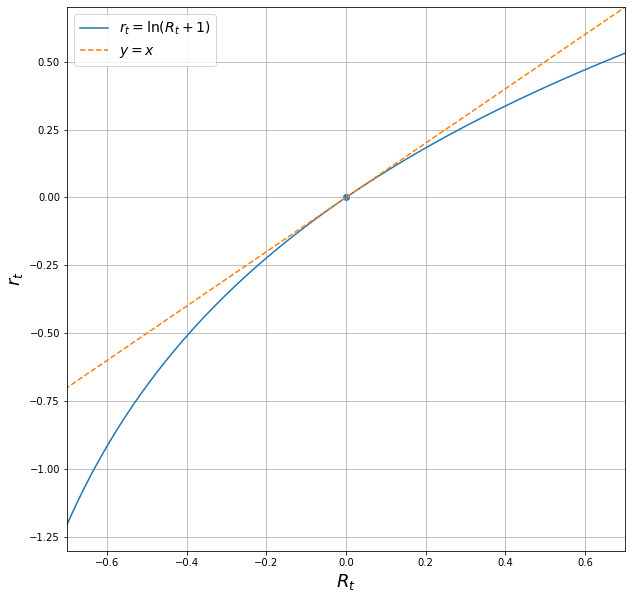

In [47]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(R, r, label = '$r_t = \ln(R_t+1)$')
ax.plot(R, R, label = '$y =x$', ls = '--')
ax.set_xlabel('$R_t$', size = 18)
ax.set_ylabel('$r_t$', size = 18)
ax.scatter(0, 0)
ax.set_xlim([-.7, .7])
ax.set_ylim([-1.3, .7])
ax.legend(fontsize = 14)
ax.grid()

As we can see if $R_t$ is small enough, it can be approximated by $r_t$.